In [2]:
import pandas as pd
import seaborn as sns
import calendar
import matplotlib.pylab as plt
%matplotlib inline
import re
import gc
import glob


In [8]:
import csv
data0 = pd.read_csv("parking-tickets-2013/Parking_Tags_Data_2013.csv", quoting=csv.QUOTE_NONE, error_bad_lines=False)
data1 = pd.read_csv("parking-tickets-2014/Parking_Tags_Data_2014_1.csv")
data2 = pd.read_csv("parking-tickets-2014/Parking_Tags_Data_2014_2.csv")
data3 = pd.read_csv("parking-tickets-2014/Parking_Tags_Data_2014_3.csv")
data4 = pd.read_csv("parking-tickets-2014/Parking_Tags_Data_2014_4.csv")

b'Skipping line 15741: expected 11 fields, saw 14\n'
b'Skipping line 120129: expected 11 fields, saw 12\n'
b'Skipping line 178600: expected 11 fields, saw 12\n'
b'Skipping line 265260: expected 11 fields, saw 12\n'
b'Skipping line 448877: expected 11 fields, saw 12\n'
b'Skipping line 481658: expected 11 fields, saw 12\n'
b'Skipping line 582687: expected 11 fields, saw 13\n'
b'Skipping line 678495: expected 11 fields, saw 12\n'
b'Skipping line 787166: expected 11 fields, saw 12\n'
b'Skipping line 925038: expected 11 fields, saw 12\n'
b'Skipping line 1341891: expected 11 fields, saw 12\n'
b'Skipping line 1574918: expected 11 fields, saw 12\n'
b'Skipping line 1648058: expected 11 fields, saw 12\nSkipping line 1675730: expected 11 fields, saw 13\n'
b'Skipping line 1766723: expected 11 fields, saw 12\n'
b'Skipping line 2129390: expected 11 fields, saw 12\n'
b'Skipping line 2207768: expected 11 fields, saw 12\n'


In [9]:
new_df = pd.concat([data0, data1, data2, data3, data4])

In [10]:
records = len(data0.index)
record1 = len(data1.index)
record2 = len(data2.index)
record3 = len(data3.index)
record4 = len(data4.index)

print("The number of tickets generated in 2013 is:", records)

print("The number of tickets generated in 2014 is:", record1+record2+record3)

The number of tickets generated in 2013 is: 2613139
The number of tickets generated in 2014 is: 2484983


In [11]:
records = len(new_df.index)
print(records)

5098122


In [12]:
new_df.head(25)


,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
0,***66151,20130101,3,PARK/LEAVE ON PRIVATE PROPERTY,30,0.0,AT,1360 DANFORTH AVE,NaN,NaN,ON
1,***41457,20130101,9,STOP-HWY-PROHIBITED TIMES/DAYS,60,1.0,NR,1709 ST CLAIR AVE W,NaN,NaN,ON
2,***41458,20130101,9,STOP-HWY-PROHIBITED TIMES/DAYS,60,2.0,NR,1687 ST CLAIR AVE W,NaN,NaN,ON
3,***85394,20130101,192,STAND SIGNED TRANSIT STOP,60,3.0,NR,5140 YONGE ST,NaN,NaN,ON
4,***57816,20130101,8,STD VEH HWY PROHIB TIME/DAY,60,4.0,OPP,227 VICTORIA ST,NaN,NaN,ON
5,***82226,20130101,8,STD VEH HWY PROHIB TIME/DAY,60,4.0,NR,224 VICTORIA ST,NaN,NaN,ON
6,***85395,20130101,192,STAND SIGNED TRANSIT STOP,60,6.0,NR,5140 YONGE ST,NaN,NaN,ON
7,***31776,20130101,3,PARK/LEAVE ON PRIVATE PROPERTY,30,10.0,NaN,270 THE KINGSWAY,NaN,NaN,ON
8,***57817,20130101,9,STOP HWY PROHIBITED TIME/DAY,60,11.0,W/S,VICTORIA ST,N/O,DUNDAS ST E,ON
9,***82227,20130101,9,STOP HWY PROHIBITED TIME/DAY,60,11.0,W/S,VICTORIA ST,N/O,DUNDAS ST E,ON


In [13]:
new_df.tail(10)

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
234973,***05858,20141231,5,PARK-SIGNED HWY-PROHIBIT DY/TM,40,2354.0,NR,3 EVERSON DR,NaN,NaN,ON
234974,***45156,20141231,29,PARK PROHIBITED TIME NO PERMIT,30,2354.0,NR,260 TORRENS AVE,NaN,NaN,ON
234975,***47834,20141231,3,PARK ON PRIVATE PROPERTY,30,2354.0,AT,232 DUPONT ST,NaN,NaN,BC
234976,***47835,20141231,3,PARK ON PRIVATE PROPERTY,30,2354.0,AT,232 DUPONT ST,NaN,NaN,ON
234977,***48217,20141231,3,PARK ON PRIVATE PROPERTY,30,2355.0,NaN,133 ISAAC DEVINS BLVD,NaN,NaN,ON
234978,***67949,20141231,29,PARK PROHIBITED TIME NO PERMIT,30,2355.0,S/S,ST MARY ST,W/O,YONGE ST,ON
234979,***60555,20141231,5,PARK-SIGNED HWY-PROHIBIT DY/TM,40,2356.0,NR,703 COLLEGE ST,NaN,NaN,ON
234980,***45157,20141231,29,PARK PROHIBITED TIME NO PERMIT,30,2357.0,NR,260 GAMBLE AVE,NaN,NaN,ON
234981,***48218,20141231,3,PARK ON PRIVATE PROPERTY,30,2358.0,NaN,14 LONDON GREEN CT,NaN,NaN,ON
234982,***87324,20141231,9,STOP-SIGNED HWY-PROHIBIT TM/DY,60,2359.0,N/S,ARMOURY ST,E/O,CENTRE AVE,ON


In [14]:
new_df.drop_duplicates()

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
0,***66151,20130101,3,PARK/LEAVE ON PRIVATE PROPERTY,30,0.0,AT,1360 DANFORTH AVE,NaN,NaN,ON
1,***41457,20130101,9,STOP-HWY-PROHIBITED TIMES/DAYS,60,1.0,NR,1709 ST CLAIR AVE W,NaN,NaN,ON
2,***41458,20130101,9,STOP-HWY-PROHIBITED TIMES/DAYS,60,2.0,NR,1687 ST CLAIR AVE W,NaN,NaN,ON
3,***85394,20130101,192,STAND SIGNED TRANSIT STOP,60,3.0,NR,5140 YONGE ST,NaN,NaN,ON
4,***57816,20130101,8,STD VEH HWY PROHIB TIME/DAY,60,4.0,OPP,227 VICTORIA ST,NaN,NaN,ON
...,...,...,...,...,...,...,...,...,...,...,...
234978,***67949,20141231,29,PARK PROHIBITED TIME NO PERMIT,30,2355.0,S/S,ST MARY ST,W/O,YONGE ST,ON
234979,***60555,20141231,5,PARK-SIGNED HWY-PROHIBIT DY/TM,40,2356.0,NR,703 COLLEGE ST,NaN,NaN,ON
234980,***45157,20141231,29,PARK PROHIBITED TIME NO PERMIT,30,2357.0,NR,260 GAMBLE AVE,NaN,NaN,ON
234981,***48218,20141231,3,PARK ON PRIVATE PROPERTY,30,2358.0,NaN,14 LONDON GREEN CT,NaN,NaN,ON


In [15]:
no_of_records = len(new_df.index)
print(no_of_records)

5098122


In [16]:
sum1 = new_df['set_fine_amount'].sum()
print("The total Revenue of year 2013 and 2014 is: CA$",sum1)


The total Revenue of year 2013 and 2014 is: CA$ 215540860


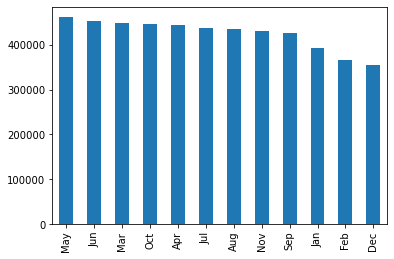

In [17]:
new_df['month_num'] = pd.to_datetime(new_df['date_of_infraction'],format='%Y%m%d').dt.month
new_df['month'] =new_df['month_num'].apply(lambda x: calendar.month_abbr[x])
new_df['month'].value_counts().plot(kind='bar')
plt.show()

In [18]:
new_df['date_of_infraction'] = pd.to_datetime(new_df['date_of_infraction'], format='%Y%m%d')

# Group by month and year, and sum the 'sales_amount' for each month-year combination
monthly_revenue = new_df.groupby(new_df['date_of_infraction'].dt.to_period('M'))['set_fine_amount'].sum()

# Print the result
print(monthly_revenue)

date_of_infraction
2013-01    8367170
2013-02    7345385
2013-03    8937225
2013-04    9204430
2013-05    9639080
2013-06    9423610
2013-07    9403005
2013-08    9460350
2013-09    9035625
2013-10    9488730
2013-11    9306625
2013-12    6942285
2014-01    8055305
2014-02    7978190
2014-03    9782100
2014-04    9531150
2014-05    9952790
2014-06    9741330
2014-07    9249455
2014-08    9016295
2014-09    8924520
2014-10    9176280
2014-11    8817240
2014-12    8762685
Freq: M, Name: set_fine_amount, dtype: int64


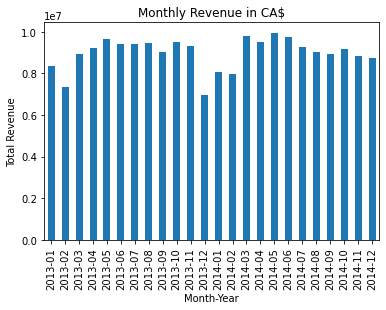

In [19]:
monthly_revenue.plot.bar()

plt.title('Monthly Revenue in CA$')
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue')

plt.show()

In [20]:
revenue_2013 = monthly_revenue[monthly_revenue.index.year == 2013]
total_revenue_2013 = revenue_2013.sum()
print("Total Revenue of Parking Tickets for 2013 is: CA$", total_revenue_2013)

revenue_2014 = monthly_revenue[monthly_revenue.index.year == 2014]
total_revenue_2014 = revenue_2014.sum()
print("Total Revenue of Parking Tickets for 2014 is: CA$", total_revenue_2014)

Total Revenue of Parking Tickets for 2013 is: CA$ 106553520
Total Revenue of Parking Tickets for 2014 is: CA$ 108987340


In [21]:
#new_df['date_of_infraction'] = pd.to_datetime(new_df['date_of_infraction'], format='%Y%m%d')

# Add a new column for the week number
#new_df['week_number'] = new_df['date_of_infraction'].dt.isocalendar().week

# Print the DataFrame to see the results
#print(new_df.head())


new_df['date_of_infraction'] = pd.to_datetime(new_df['date_of_infraction'], format='%Y%m%d')

new_df['day_of_week'] = new_df['date_of_infraction'].dt.strftime('%A')

print(new_df.head())

  tag_number_masked date_of_infraction  infraction_code  \
0          ***66151         2013-01-01                3   
1          ***41457         2013-01-01                9   
2          ***41458         2013-01-01                9   
3          ***85394         2013-01-01              192   
4          ***57816         2013-01-01                8   

           infraction_description  set_fine_amount  time_of_infraction  \
0  PARK/LEAVE ON PRIVATE PROPERTY               30                 0.0   
1  STOP-HWY-PROHIBITED TIMES/DAYS               60                 1.0   
2  STOP-HWY-PROHIBITED TIMES/DAYS               60                 2.0   
3       STAND SIGNED TRANSIT STOP               60                 3.0   
4     STD VEH HWY PROHIB TIME/DAY               60                 4.0   

  location1            location2 location3 location4 province  month_num  \
0        AT    1360 DANFORTH AVE       NaN       NaN       ON          1   
1        NR  1709 ST CLAIR AVE W       NaN      

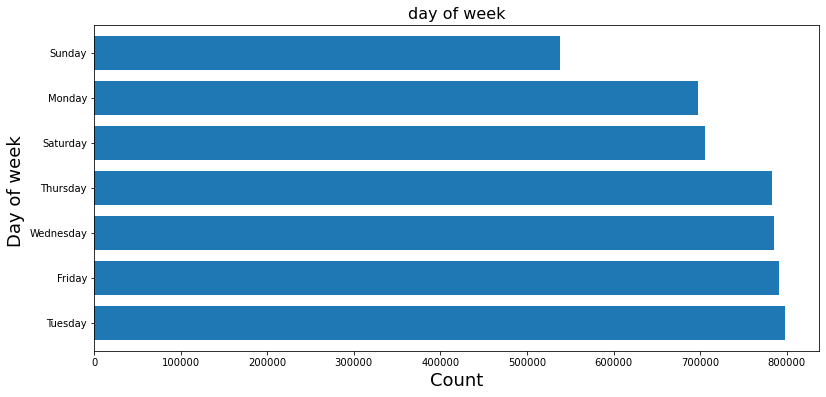

In [22]:
new_df['day_of_week'].value_counts().plot(kind='barh',width = 0.75,figsize=(13,6))
plt.title("day of week", fontsize=16)
plt.ylabel("Day of week ", fontsize=18)
plt.xlabel("Count", fontsize=18)
plt.show()

In [38]:
df['hour'] = new_df['time_of_infraction'].astype(int)
df['minute'] = (new_df['time_of_infraction'] - df['hour']) * 60

# Convert the hour and minute to timedelta format
new_df['time_of_infraction'] = pd.to_timedelta(df['hour'], unit='H') + pd.to_timedelta(df['minute'], unit='m')

# Extract the hour from the 'time' column
df['hour'] = new_df['time_of_infraction'].dt.components.hours

# Group by hour and count the occurrences of each hour
hour_counts = df['hour'].value_counts()

# Find the peak hours (the hours with the highest occurrences)
peak_hours = hour_counts[hour_counts == hour_counts.max()]

# Print the result
print("Peak Hours:")
print(peak_hours)

ValueError: Cannot convert non-finite values (NA or inf) to integer



The data includes 5,098,122 tickets given out across 730 days. The date range 
spans 729 days from 2013-01-01 to 2014-12-31 .



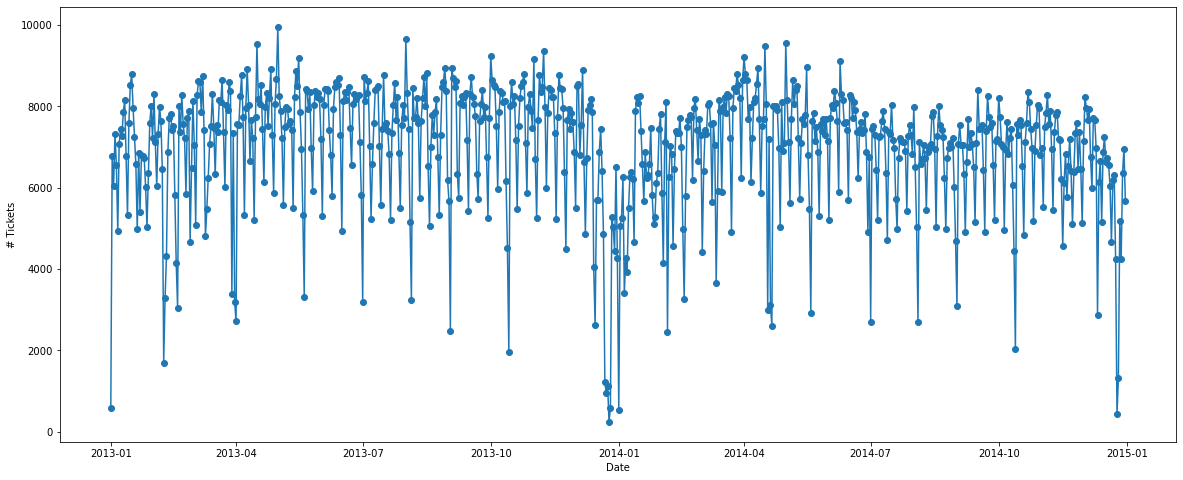

13436

In [23]:
cntIns = new_df.groupby(['date_of_infraction']).size().reset_index(name='count')

x = pd.DataFrame(pd.to_datetime(cntIns['date_of_infraction'],format='%Y%m%d').dt.date)
y = pd.DataFrame(cntIns['count'])

timePlot = pd.concat([x,y], axis=1)

cntObs = timePlot['count'].sum() # count of observations
cntDays = y.shape[0] # count of days

minDate = timePlot['date_of_infraction'].min() # date of first observation
maxDate = timePlot['date_of_infraction'].max() # datet of last observation

dateRange = re.split('\,', str(maxDate - minDate))
dateRange = dateRange[0]

print("\n\nThe data includes", "{:,}".format(cntObs), "tickets given out across", cntDays, "days. The date range \nspans", dateRange, "from", minDate, "to", maxDate, ".\n")

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
ax.set(xlabel='Date', ylabel='# Tickets')
ax.plot_date(x=timePlot['date_of_infraction'], y=timePlot['count'],ls='-', marker='o')
plt.show()
del x, y, timePlot, fig, ax
gc.collect()

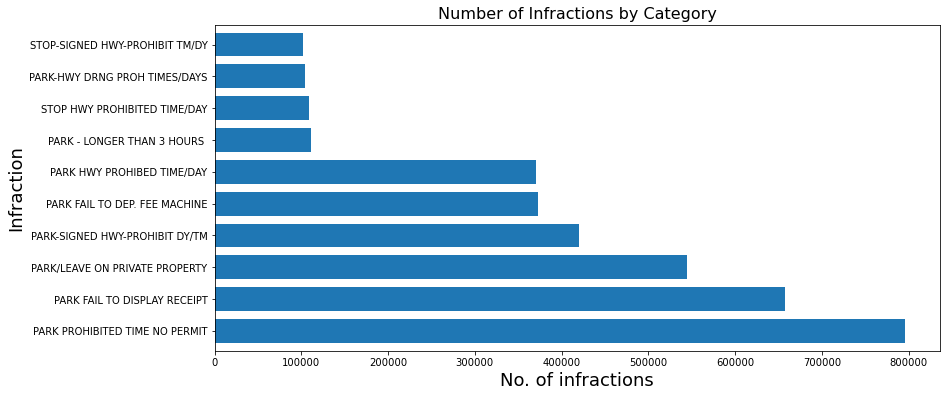

In [24]:
new_df['infraction_description'].value_counts().nlargest(10).plot(kind='barh',width = 0.75,figsize=(13,6))
plt.title("Number of Infractions by Category", fontsize=16)
plt.ylabel("Infraction", fontsize=18)
plt.xlabel("No. of infractions", fontsize=18)
plt.show()

In [25]:
fine_by_infraction = new_df.groupby('infraction_description')['set_fine_amount'].sum()

In [26]:
print(fine_by_infraction)

infraction_description
FAIL PARK/STOP CLOSE AS PRACT       45
FAIL PARK/STOP PAR CURB LEFT S      15
FAIL PARK/STOP PAR CURB LF SID      15
FAIL PARK/STOP PAR RH LTD HWY     9210
FAIL PARK/STOP PAR RT HAND LTD    6450
                                  ... 
STOP/PARK/LEAVE/STAND CLSD ST     2250
STOP/STAND/PARK - NO VEND ZONE     120
STOP/STAND/PARK VEND CONT ZONE    4740
STOP/STAND/PARK VEND NO PERMIT     630
STOP=BSD OBSTR RDWY-IMPEDE TRF    4920
Name: set_fine_amount, Length: 430, dtype: int64


In [27]:
sorted_data = fine_by_infraction.sort_values(ascending=False)

top_10_infractions = sorted_data.head(10)


print(top_10_infractions)

infraction_description
PARK PROHIBITED TIME NO PERMIT    23890380
PARK FAIL TO DISPLAY RECEIPT      19729770
PARK-SIGNED HWY-PROHIBIT DY/TM    16793920
PARK/LEAVE ON PRIVATE PROPERTY    16350960
PARK HWY PROHIBED TIME/DAY        14835400
PARK FAIL TO DEP. FEE MACHINE     11179890
PARK IN A FIRE ROUTE              10582500
STOP-SIGNED HIGHWAY-RUSH HOUR      8341350
STOP HWY PROHIBITED TIME/DAY       6522300
STOP-SIGNED HWY-PROHIBIT TM/DY     6136080
Name: set_fine_amount, dtype: int64


In [28]:
pd.crosstab(index=new_df['province'], columns='count').nlargest(10,'count')

col_0,count
province,
ON,4801476
QC,89587
AB,31341
NY,19932
BC,16614
NS,13133
FL,10855
MI,10727
MB,9422


In [29]:
tempticks=new_df[new_df['location2']!='NaN']
tempticks['location2'] = tempticks['location2'].str.replace('\d+', '')
print(tempticks['location2'].describe())
pd.crosstab(index=tempticks['location2'], columns='count').nlargest(10,'count')

count       5097296
unique        25657
top        YONGE ST
freq         150527
Name: location2, dtype: object


col_0,count
location2,
YONGE ST,150527
BLOOR ST W,131366
DANFORTH AVE,90350
QUEEN ST W,88745
QUEEN ST E,72866
KING ST W,68413
COLLEGE ST,66863
ST CLAIR AVE W,55353
DUNDAS ST W,51782


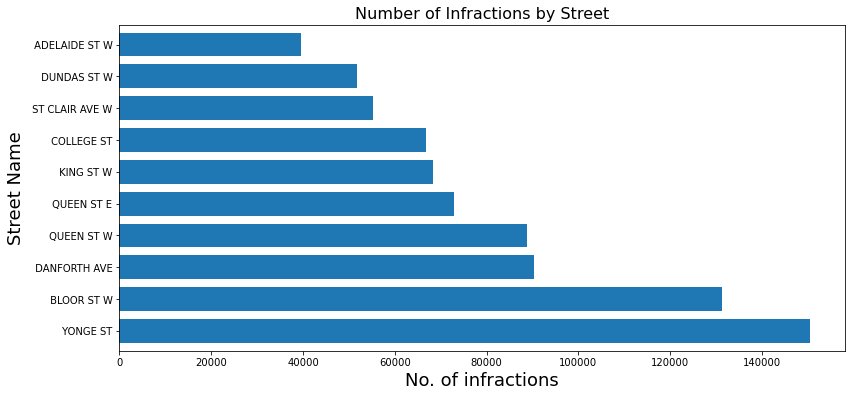

In [30]:
tempticks['location2'].value_counts().nlargest(10).plot(kind='barh',figsize=(13,6), width = 0.75)
plt.title("Number of Infractions by Street", fontsize=16)
plt.ylabel("Street Name", fontsize=18)
plt.xlabel("No. of infractions", fontsize=18)
plt.show()

In [31]:
tempticks=new_df[new_df['location2']!='NaN']
tempticks['location2'] = tempticks['location2'].str.replace('\d+', '')
print(tempticks['location2'].describe())
pd.crosstab(index=tempticks['location2'], columns='count').nlargest(15,'count')

count       5097296
unique        25657
top        YONGE ST
freq         150527
Name: location2, dtype: object


col_0,count
location2,
YONGE ST,150527
BLOOR ST W,131366
DANFORTH AVE,90350
QUEEN ST W,88745
QUEEN ST E,72866
KING ST W,68413
COLLEGE ST,66863
ST CLAIR AVE W,55353
DUNDAS ST W,51782


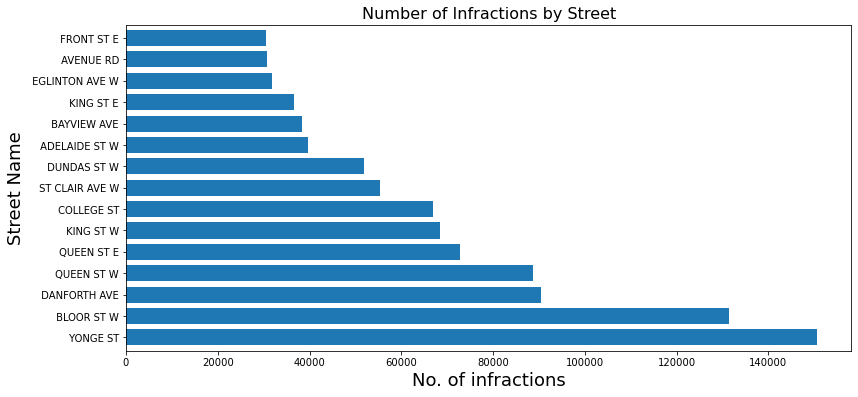

In [32]:
tempticks['location2'].value_counts().nlargest(15).plot(kind='barh',figsize=(13,6), width = 0.75)
plt.title("Number of Infractions by Street", fontsize=16)
plt.ylabel("Street Name", fontsize=18)
plt.xlabel("No. of infractions", fontsize=18)
plt.show()

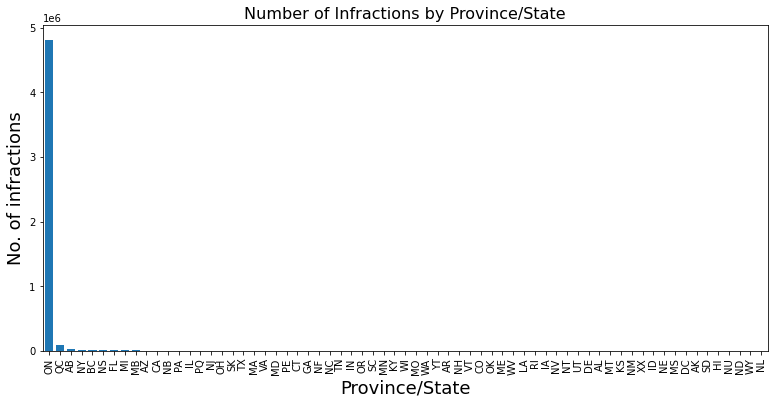

In [33]:
new_df['province'].value_counts().plot(kind='bar',figsize=(13,6),width = 0.75)
plt.title("Number of Infractions by Province/State", fontsize=16)
plt.xlabel("Province/State", fontsize=18)
plt.ylabel("No. of infractions", fontsize=18)
plt.show()

In [34]:
new_df['locality'] = new_df['province'].apply(lambda x: 'Ontario' if x=='ON' else 'Other')
pd.crosstab(index=new_df['locality'], columns='count')

col_0,count
locality,
Ontario,4801476
Other,296646


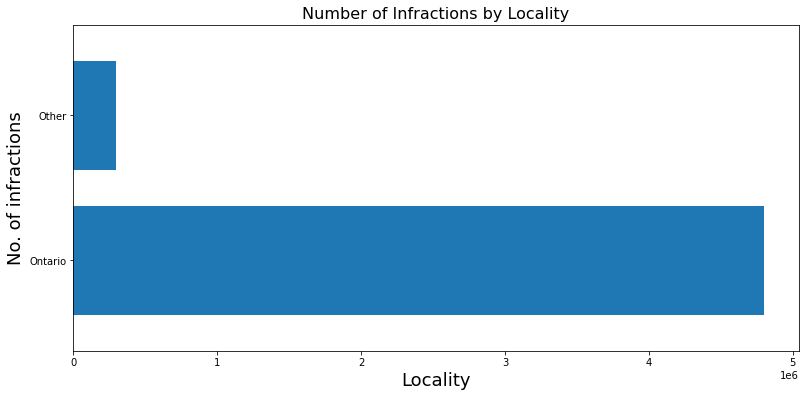

In [35]:
new_df['locality'].value_counts().plot(kind='barh',figsize=(13,6),width = 0.75)
plt.title("Number of Infractions by Locality", fontsize=16)
plt.xlabel("Locality", fontsize=18)
plt.ylabel("No. of infractions", fontsize=18)
plt.show()